提取主播咲间妮娜（mid为573930836）2022年11月的数据作为检验模型有效性的数据，将爬取得到的其真实数据与模型预测得到的数据进行拟合，判断模型是否有效。

以系统动力学标准，误差在10%以下即为有效。

Extract the data of anchor Nina Sakima (mid as 573930836) in November 2022 as the data to test the validity of the model, and fit its real data obtained by crawling with the data obtained by the model prediction to determine whether the model is valid or not. 

With the system dynamics criterion, an error of 10% or less is considered valid.

In [2]:
import numpy as np  
import pandas as pd  
fan_data=pd.read_csv("Crawled_Dataset\虚拟主播粉丝数据.csv",encoding="UTF-8")
monthfan=fan_data[(fan_data['created_at']>='2022-11-01')&(fan_data['created_at']<='2022-11-30')]

#### fan data comparison

In [3]:
import re
DATE=[]
for index, row in monthfan.iterrows():
    date=re.findall(r'(.*)T', row['created_at'])
    DATE.append(date[0])
monthfan['created_at']=DATE

Z:\TEMP\ipykernel_20892\16159819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthfan['created_at']=DATE


In [4]:
nina_real=monthfan[monthfan['mid']==573930836]
nina_real = nina_real.reset_index(drop=True)
nina_real=nina_real[['mid','fans','created_at']]
#nina_real.drop([len(nina_real)-1],inplace=True)
nina_real['Time'] =[i for i in range(0,29)]
nina_real=nina_real.rename(columns={'fans':'realfans'})
nina_real.head()

,mid,realfans,created_at,Time
0,573930836,68957.0,2022-11-01,0
1,573930836,69043.0,2022-11-02,1
2,573930836,69361.0,2022-11-03,2
3,573930836,69425.0,2022-11-04,3
4,573930836,69637.0,2022-11-05,4


In [88]:
nina_model=pd.read_csv('Nina_Model_Results\nina_fan.csv',encoding='gbk')
nina_model=nina_model.rename(columns={'Time (Day)':'Time'})
nina_model=nina_model.rename(columns={'fans : current':'modelfans'})
#nina_model.drop([len(jiaran_model)-1],inplace=True)
nina_model.head()

,Time,modelfans
0,0,68957
1,1,69162
2,2,69369
3,3,69451
4,4,69452


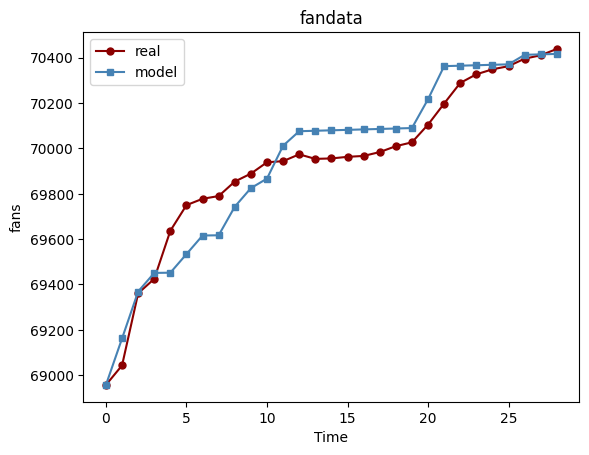

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('fandata')
plt.xlabel('Time')  # x轴标题
plt.ylabel('fans')  # y轴标题

plt.plot(range(len(nina_real)), list(nina_real['realfans']), label='real', color='darkred',marker='o',markerfacecolor='darkred',markersize='5')
plt.plot(range(len(nina_model)), list(nina_model['modelfans']), label='model', color='steelblue',marker='s',markerfacecolor='steelblue',markersize='5')

plt.legend(['real', 'model'])

In [127]:
nina=pd.merge(nina_real,nina_model,on='Time',how='left')
nina['dis_per'] = (nina['modelfans'] - nina['realfans'])*100/nina['realfans']
nina

,mid,realfans,created_at,Time,modelfans,dis_per
0,573930836,68957.0,2022-11-01,0,68957,0.000000
1,573930836,69043.0,2022-11-02,1,69162,0.172356
2,573930836,69361.0,2022-11-03,2,69369,0.011534
3,573930836,69425.0,2022-11-04,3,69451,0.037450
4,573930836,69637.0,2022-11-05,4,69452,-0.265663
5,573930836,69750.0,2022-11-06,5,69534,-0.309677
6,573930836,69778.0,2022-11-07,6,69616,-0.232165
7,573930836,69790.0,2022-11-08,7,69617,-0.247887
8,573930836,69854.0,2022-11-09,8,69743,-0.158903
9,573930836,69889.0,2022-11-10,9,69825,-0.091574


In [ ]:
#存储模型预测数据与实际数据的比较及偏差值
nina.to_csv('Nina_Model_Results\nina_fan_compare.csv',mode='w',encoding='utf-8')

#### currency data comparison

In [73]:
earn_data=pd.read_csv("Crawled_Dataset\直播间营收数据.csv",encoding="UTF-8")
monthearn=earn_data[(earn_data['date']>='2022-11-01T00:00:00Z')&(earn_data['date']<='2022-12-01T00:00:00Z')]
ninarealearn=monthearn[monthearn['mid']==350832135]

In [74]:
ninarealearn.sort_values(by="date" , inplace=True, ascending=True) 
ninarealearn.head()

Z:\TEMP\ipykernel_20892\1093670397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninarealearn.sort_values(by="date" , inplace=True, ascending=True)


,Unnamed: 0,mid,date,count,currency
151638,151638,350832135,2022-11-01T00:00:00Z,474,1821.0
151637,151637,350832135,2022-11-02T00:00:00Z,122,2560.8
151636,151636,350832135,2022-11-03T00:00:00Z,141,2550.0
151635,151635,350832135,2022-11-04T00:00:00Z,160,353.1
151634,151634,350832135,2022-11-05T00:00:00Z,349,327.1


In [75]:
date1=[]
totalearn=[]
totale=0
for index, row in ninarealearn.iterrows():
    date=re.findall(r'(.*)T', row['date'])
    date1.append((date[0]))
    totale+=row['currency']
    totalearn.append(totale)
ninarealearn['Time']=date1
ninarealearn['totalearn']=totalearn
ninarealearn=ninarealearn[['mid','currency','Time','totalearn','count']]

Z:\TEMP\ipykernel_20892\2116216322.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninarealearn['Time']=date1
Z:\TEMP\ipykernel_20892\2116216322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninarealearn['totalearn']=totalearn


In [77]:
ninarealearn['Time'] =[i for i in range(1,30)]
#ninarealearn

In [149]:
nina_earnmodel=pd.read_csv('Nina_Model_Data\nina_income.csv',encoding='gbk')
nina_earnmodel=nina_earnmodel.rename(columns={'Time (Day)':'Time'})
nina_earnmodel=nina_earnmodel.rename(columns={'income total : newone':'modelincome'})
nina_earnmodel['Time'] =[i for i in range(1,33)]
nina_earnmodel.head()

,Time,modelincome
0,1,1821.00
1,2,4391.10
2,3,6966.27
3,4,7214.65
4,5,7463.02


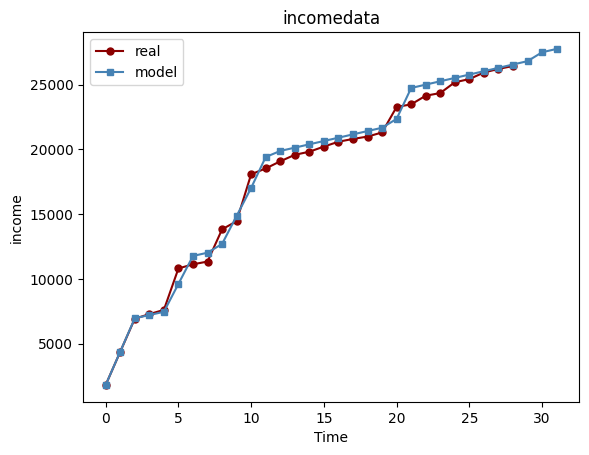

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('incomedata')
plt.xlabel('Time')  # x轴标题
plt.ylabel('income')  # y轴标题

plt.plot(range(len(ninarealearn)), list(ninarealearn['totalearn']), label='real', color='darkred',marker='o',markerfacecolor='darkred',markersize='5')
plt.plot(range(len(nina_earnmodel)), list(nina_earnmodel['modelincome']), label='model', color='steelblue',marker='s',markerfacecolor='steelblue',markersize='5')

plt.legend(['real', 'model'])

In [151]:
nina1=pd.merge(ninarealearn,nina_earnmodel,on='Time',how='left')
nina1['dis_per'] = (nina1['modelincome'] - nina1['totalearn'])/nina1['totalearn']
nina1['dis_per']=nina1['dis_per']*100
nina1

,mid,currency,Time,totalearn,count,modelincome,dis_per
0,350832135,1821.0,1,1821.0,474,1821.00,0.000000
1,350832135,2560.8,2,4381.8,122,4391.10,0.212242
2,350832135,2550.0,3,6931.8,141,6966.27,0.497273
3,350832135,353.1,4,7284.9,160,7214.65,-0.964323
4,350832135,327.1,5,7612.0,349,7463.02,-1.957173
5,350832135,3197.4,6,10809.4,356,9616.47,-11.036043
6,350832135,320.6,7,11130.0,110,11773.80,5.784367
7,350832135,211.2,8,11341.2,139,12024.30,6.023172
8,350832135,2486.6,9,13827.8,574,12700.10,-8.155310
9,350832135,627.8,10,14455.6,435,14862.60,2.815518


In [ ]:
nina1.to_csv('Model_validity\nina_currency_compare.csv',mode='w',encoding='utf-8')